In [3]:
%matplotlib inline
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import os
import torch
import torch.nn as nn
import torchvision
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
from torch import optim
from tqdm import tqdm_notebook as tqdm
import torch.nn.functional as F
from IPython.display import clear_output
import import_ipynb
import auto

importing Jupyter notebook from auto.ipynb


In [4]:
class Args():
    def __init__(self):
        self.image_path = ""
        self.model_save_path = ""
args = Args()

In [5]:
def load_data(imsize=128, batch_size=2):
    'load data into dataset class based on the structuring of data'
    train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])
    train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [3442, 500])
    trainloader = torch.utils.data.DataLoader(train_dataset,
                   shuffle=True, batch_size=batch_size)
    testloader = torch.utils.data.DataLoader(val_dataset,
                   shuffle=True, batch_size=batch_size)
    valloader = torch.utils.data.DataLoader(val_dataset,
                   shuffle=True, batch_size=batch_size)
    
    return trainloader, testloader, valloader

In [ ]:
trainloader, testloader, valloader = load_data()

### Use transfer learning:
- Start with a pretrained network like a resnet50, replace the fully connected layer with number of nodes = number of classes
- retrain the final layer and then the lower layers depending on how similar your data is in comparision to the data on which the pretrained network is trained. 
- i.e. if your data is of a similar distribution to that of the data trained on the algorithm, you need not retrain a lot of layers, just the top few layers might give you good performace.

In [5]:
model = models.resnet50(pretrained=True)
for param in model.parameters():
    param.requires_grad = True
    
model.fc = nn.Sequential(nn.Linear(2048, 512),
                                 nn.ReLU(),
                                 nn.Dropout(0.2),
                                 nn.Linear(512, 2),
                                 nn.LogSoftmax(dim=1))
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

Call the learner class and train the model, activate the flags as needed  

In [1]:
learner = auto.Learner()

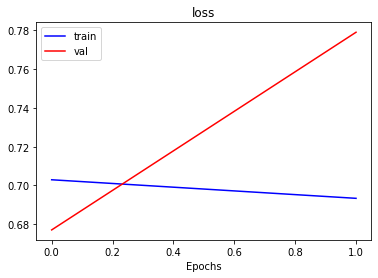

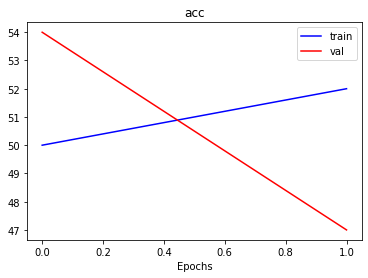

KeyboardInterrupt: 

In [23]:
learner.fit(model, cuda=True, plot_acc=True, epoch=10, reset_full_model=True)

In [30]:
learner.predict(cuda=True,load_model=True, model_path='')

The test accuracy is 99%
